In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load DataSet

df = pd.read_csv("Netflix DataSet.csv")

print(df.head())     # Preview Data

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [3]:
# Basic Exploration and Cleaning
# Checking Dimensions and columns

print(df.shape)
print(df.info())
print(df.describe(include = 'all'))

(8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
       show_id   type   title       director                cast  \
count     8807   8807    8807           6173                7982   
unique    8807      2    8804           4528                7692   
top         s1  Movie  15-Aug  R

In [4]:
# Handle missing values

df.isnull().sum()    # Count missing values

df['country'] = df['country'].fillna("Unknown")    # Fill the blank items from "country".

df.dropna(subset = ['director','cast'], inplace = True)   # Remove Row which has a NaN values from director or cast

<Axes: title={'center': 'Movie vs TV Shows'}, xlabel='type'>

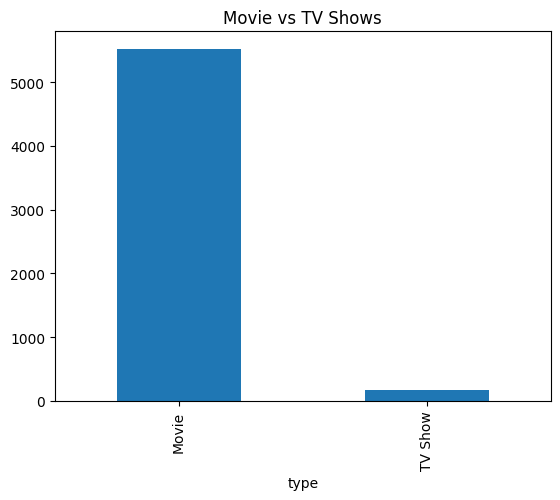

In [5]:
# Content Type Analysis
# How many Movies vs TV Shows

df['type'].value_counts().plot(kind = "bar", title = "Movie vs TV Shows")

<Axes: title={'center': 'Content over Years'}, xlabel='release_year'>

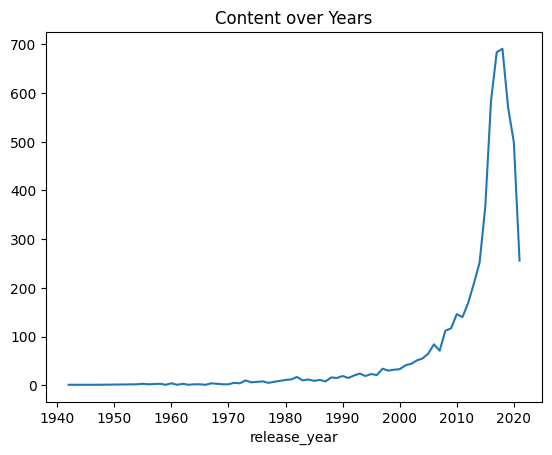

In [6]:
# Time-Based Analysis
# Number of shows/movies per release year?

df['release_year'].value_counts().sort_index().plot(kind = "line", title = "Content over Years")

In [7]:
# Extract year from 'date_added' column

df['date_added'] = pd.to_datetime(df['date_added'].astype(str).str.strip(), errors='coerce')      # converting str date to date format
df['added_year'] = df['date_added'].dt.year       # # Adding new coloum of year


<Axes: title={'center': 'Top Countries by content'}, ylabel='country'>

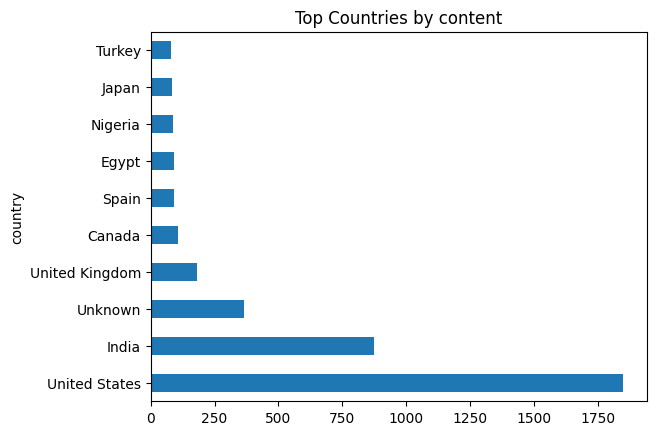

In [8]:
# Country-Wise Content Distribution
# Top 10 Countries by content

df['country'].value_counts().head(10).plot(kind = 'barh', title = "Top Countries by content")


<Axes: title={'center': 'Top 10 Directors'}, ylabel='director'>

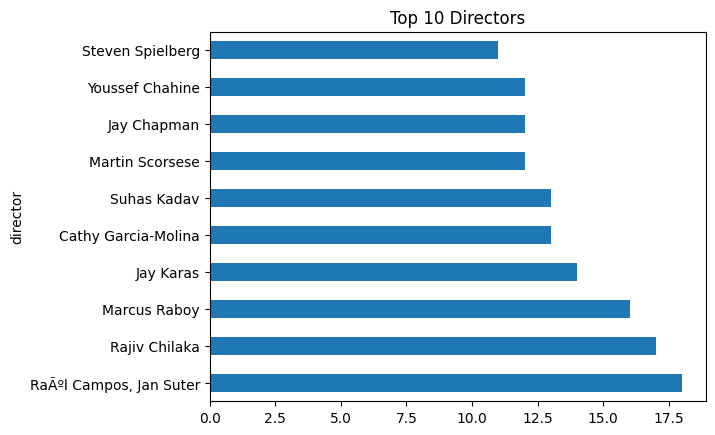

In [9]:
# Director & Cast Insights
 # Top 10 Directors:

df['director'].value_counts().head(10).plot(kind = 'barh', title = 'Top 10 Directors')

In [10]:
 # Top Actors (Optional using .str.split() + explode)

actors = df['cast'].dropna().str.split(', ')
all_actors = actors.explode()
all_actors.value_counts().head(10)

cast
Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    32
Om Puri             30
Akshay Kumar        30
Amitabh Bachchan    28
Paresh Rawal        28
Julie Tejwani       28
Rupa Bhimani        27
Boman Irani         27
Name: count, dtype: int64

In [11]:
# Duration Analysis
 # Average Movie Duration (Use NumPy)




movies = df[df['type'] == 'Movie'].copy()

# Only keep rows where duration ends with 'min'
movies = movies[movies['duration'].str.contains('min', na=False)]

# Now convert to float
movies['duration_mins'] = movies['duration'].str.replace(' min', '', regex=False).astype(float)

# Now filter Indian movies with safe numeric durations
indian_movies = movies[movies['country'].str.contains('India', na=False)]

# Done!
indian_movies[['title', 'duration_mins']].head()

# movies = df[df['type'] == 'Movie'].copy()
movies['duration_mins'] = movies['duration'].str.replace(' min', '').astype(float)

print("Average of Total Movies Duration ",np.mean(movies['duration_mins']))

Average of Total Movies Duration  102.23790541764812


<Axes: title={'center': 'Number of Seasons'}, xlabel='seasons'>

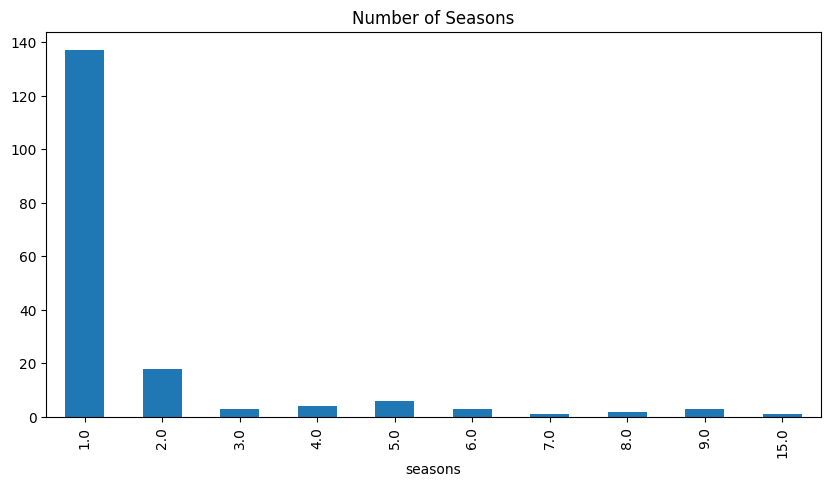

In [12]:
# TV Shows by Number of Seasons

# Filter TV Shows
tv_shows = df[df['type'] == 'TV Show'].copy()

# Extract number of seasons using regex (only digits at start)
tv_shows['seasons'] = tv_shows['duration'].str.extract(r'(\d+)').astype(float)

# Now plot
tv_shows['seasons'].value_counts().sort_index().plot(kind='bar', title="Number of Seasons", figsize=(10,5))

    


<Axes: title={'center': 'Rating Distrubution'}, xlabel='rating'>

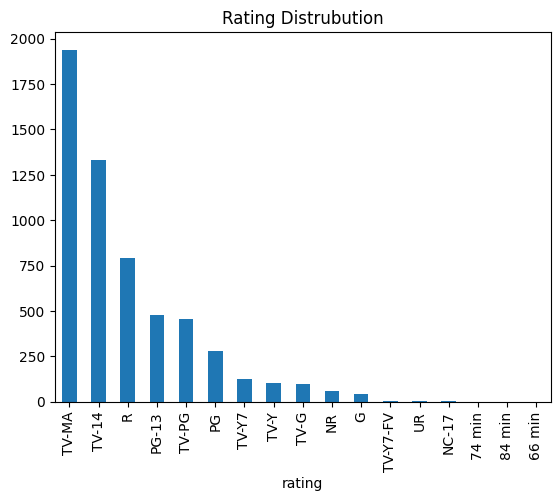

In [13]:
# Ratings Breakdown
 # Which ratings are most common?

df['rating'].value_counts().plot(kind = 'bar', title = "Rating Distrubution")

<Axes: xlabel='rating'>

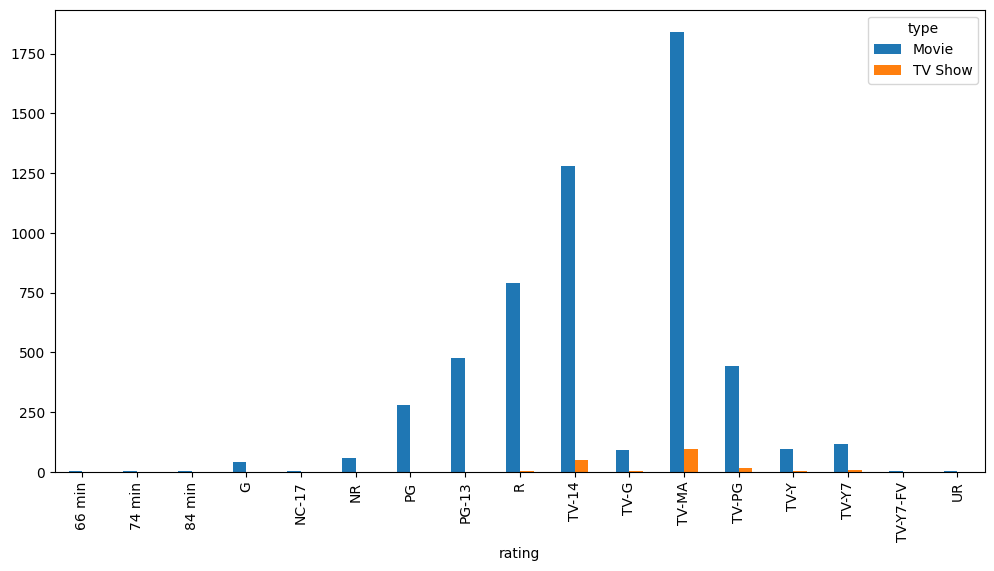

In [14]:
# Ratings in Movies vs TV Shows

df.groupby('type')['rating'].value_counts().unstack().fillna(0).T.plot(kind='bar', figsize=(12,6))


In [15]:
# Filters & Analysis


print("Movies with 'India' in country:", movies[movies['country'].str.contains('India', na=False)].shape[0])
print("Movies longer than 100 mins:", movies[movies['duration_mins'] > 100].shape[0])



Movies with 'India' in country: 932
Movies longer than 100 mins: 2727


In [16]:
# Show only Indian Movies > 100 minutes

indian_movies = movies[(movies['country'].str.contains('India')) & (movies['duration_mins'] > 100)]
indian_movies[['title', 'duration_mins']]


,title,duration_mins
24,Jeans,166.0
29,Paranoia,106.0
105,Angamaly Diaries,128.0
114,Anjaam,143.0
116,Dhanak,114.0
...,...,...
8772,Yamla Pagla Deewana 2,147.0
8773,Yanda Kartavya Aahe,151.0
8798,Zed Plus,131.0
8799,Zenda,120.0


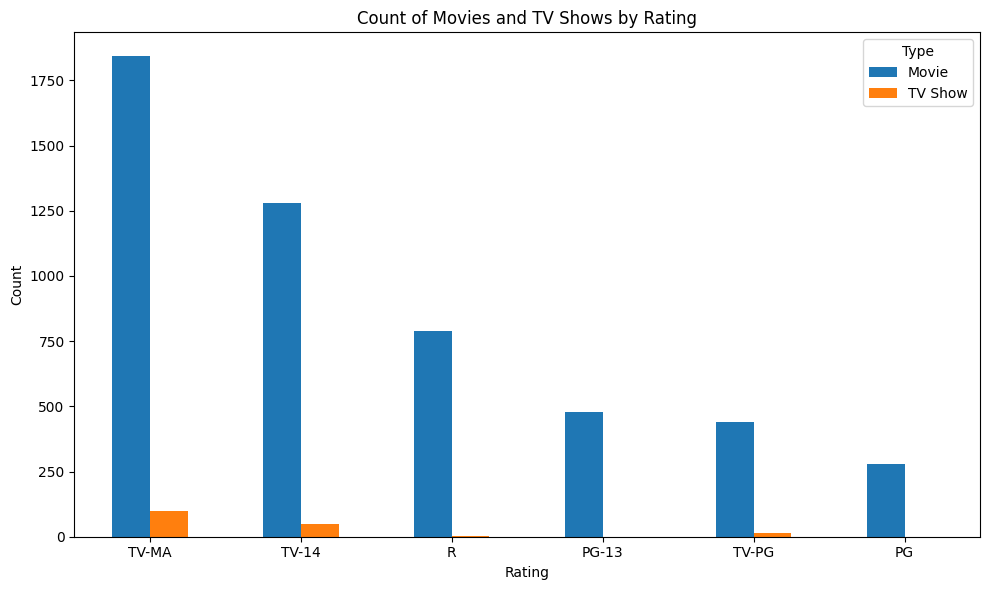

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Fill missing ratings
df['rating'] = df['rating'].fillna('Unknown')

# Group by type and rating
grouped = df.groupby(['type', 'rating']).size().unstack(fill_value=0)

# Optional: sort ratings by total count (for cleaner view)
grouped = grouped.loc[:, grouped.sum().sort_values(ascending=False).index[:6]]  # top 6 ratings

# Plot
grouped.T.plot(kind='bar', figsize=(10, 6))
plt.title("Count of Movies and TV Shows by Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Type")
plt.tight_layout()
plt.show()
